In [ ]:
#Data cleaning on alaska

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [111]:
data_EagleAmerican = pd.read_csv("Spirit_airlinef2020.csv",index_col = 0)
data_EagleAmerican


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
1911,1,6,NK,DTW,MCO,1614.0,0.0,1600-1659,1902.0,0.0,957.0
1912,1,6,NK,MCI,LAS,1817.0,0.0,1800-1859,1911.0,0.0,1139.0
1913,1,6,NK,LAS,SEA,2104.0,0.0,2100-2159,2333.0,0.0,867.0
1914,1,6,NK,IAH,DTW,1951.0,0.0,1900-1959,2347.0,0.0,1075.0
1915,1,6,NK,IAH,LAS,902.0,0.0,0900-0959,1000.0,0.0,1222.0
...,...,...,...,...,...,...,...,...,...,...,...
570144,29,6,NK,BNA,MSY,848.0,0.0,0800-0859,1011.0,0.0,471.0
570145,29,6,NK,BWI,MCO,1700.0,1.0,1600-1659,1911.0,0.0,787.0
570146,29,6,NK,LAS,DTW,811.0,0.0,0800-0859,1454.0,0.0,1749.0
570147,29,6,NK,OAK,LAS,555.0,0.0,0600-0659,716.0,0.0,407.0


In [112]:
data_EagleAmerican.isnull().sum()

DAY_OF_MONTH     0
DAY_OF_WEEK      0
OP_CARRIER       0
ORIGIN           0
DEST             0
DEP_TIME        56
DEP_DEL15       56
DEP_TIME_BLK     0
ARR_TIME        61
ARR_DEL15       85
DISTANCE         0
dtype: int64

In [113]:
data_EagleAmerican.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17364 entries, 1911 to 570148
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAY_OF_MONTH  17364 non-null  int64  
 1   DAY_OF_WEEK   17364 non-null  int64  
 2   OP_CARRIER    17364 non-null  object 
 3   ORIGIN        17364 non-null  object 
 4   DEST          17364 non-null  object 
 5   DEP_TIME      17308 non-null  float64
 6   DEP_DEL15     17308 non-null  float64
 7   DEP_TIME_BLK  17364 non-null  object 
 8   ARR_TIME      17303 non-null  float64
 9   ARR_DEL15     17279 non-null  float64
 10  DISTANCE      17364 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [114]:
data_EagleAmerican.dropna(inplace=True)

In [115]:
data_EagleAmerican.isnull().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
ARR_TIME        0
ARR_DEL15       0
DISTANCE        0
dtype: int64

In [116]:
data_EagleAmerican.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17279 entries, 1911 to 570148
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAY_OF_MONTH  17279 non-null  int64  
 1   DAY_OF_WEEK   17279 non-null  int64  
 2   OP_CARRIER    17279 non-null  object 
 3   ORIGIN        17279 non-null  object 
 4   DEST          17279 non-null  object 
 5   DEP_TIME      17279 non-null  float64
 6   DEP_DEL15     17279 non-null  float64
 7   DEP_TIME_BLK  17279 non-null  object 
 8   ARR_TIME      17279 non-null  float64
 9   ARR_DEL15     17279 non-null  float64
 10  DISTANCE      17279 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [117]:
data_EagleAmerican.to_csv('Data_sprint.csv')

In [81]:
data_alaska = pd.read_csv("Alaska_Delta.csv",index_col = 0)
 
data_alaska=data_alaska[data_alaska['DAY_OF_WEEK']==5]
data_alaska

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
5761,1,5,AS,DCA,SEA,754.0,0.0,0800-0859,1105.0,0.0,2329.0
5762,1,5,AS,SEA,DCA,1357.0,0.0,1400-1459,2148.0,0.0,2329.0
5763,1,5,AS,DCA,SEA,1842.0,0.0,1800-1859,2127.0,0.0,2329.0
5764,1,5,AS,SEA,DCA,813.0,0.0,0800-0859,1629.0,0.0,2329.0
5765,1,5,AS,JFK,SEA,714.0,0.0,0700-0759,1042.0,0.0,2422.0
...,...,...,...,...,...,...,...,...,...,...,...
415599,22,5,AS,SFO,SAN,1912.0,1.0,1800-1859,2039.0,1.0,447.0
415600,22,5,AS,SAN,SFO,1617.0,0.0,1600-1659,1755.0,0.0,447.0
415601,22,5,AS,SFO,SAN,2135.0,0.0,2100-2159,2256.0,0.0,447.0
415602,22,5,AS,SAN,SFO,2125.0,1.0,2100-2159,2253.0,1.0,447.0


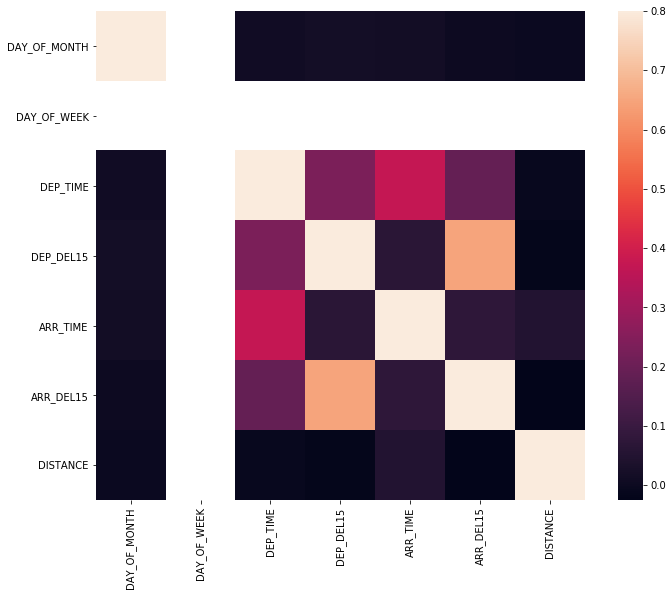

In [52]:
corrmat = data_alaska.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [53]:
data_alaska = pd.read_csv("Alaska_airlinesf2019.csv",index_col = 0)
 
data_alaska=data_alaska[data_alaska['ORIGIN']=='DCA']
data_alaska

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
5761,1,5,AS,DCA,SEA,754.0,0.0,0800-0859,1105.0,0.0,2329.0
5763,1,5,AS,DCA,SEA,1842.0,0.0,1800-1859,2127.0,0.0,2329.0
6140,1,5,AS,DCA,PDX,1728.0,0.0,1700-1759,2021.0,0.0,2350.0
6229,1,5,AS,DCA,SFO,1738.0,1.0,1700-1759,2051.0,1.0,2442.0
6230,1,5,AS,DCA,LAX,904.0,0.0,0900-0959,1200.0,0.0,2311.0
...,...,...,...,...,...,...,...,...,...,...,...
518364,28,4,AS,DCA,SEA,746.0,0.0,0800-0859,1036.0,0.0,2329.0
518366,28,4,AS,DCA,SEA,1908.0,0.0,1800-1859,2152.0,0.0,2329.0
518772,28,4,AS,DCA,PDX,1733.0,0.0,1700-1759,2029.0,0.0,2350.0
518856,28,4,AS,DCA,SFO,1804.0,1.0,1700-1759,2227.0,1.0,2442.0


In [68]:
data_alaska = pd.read_csv("Alaska_airlinesf2019.csv",index_col = 0)
 
data_alaska =data_alaska[(data_alaska.DAY_OF_WEEK ==1) & (data_alaska.ORIGIN== 'SAN')]
data_alaska

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
62948,4,1,AS,SAN,LIH,637.0,0.0,0600-0659,1115.0,0.0,2676.0
63010,4,1,AS,SAN,SEA,1943.0,1.0,1700-1759,2237.0,1.0,1050.0
63043,4,1,AS,SAN,BWI,2220.0,0.0,2200-2259,602.0,0.0,2295.0
63052,4,1,AS,SAN,SEA,2040.0,1.0,1900-1959,4.0,1.0,1050.0
63062,4,1,AS,SAN,SEA,1740.0,1.0,1100-1159,2025.0,1.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...
456360,25,1,AS,SAN,PDX,1941.0,1.0,1800-1859,2206.0,1.0,933.0
473308,25,1,AS,SAN,SFO,659.0,0.0,0700-0759,852.0,0.0,447.0
473313,25,1,AS,SAN,SFO,1141.0,1.0,1100-1159,1330.0,1.0,447.0
473314,25,1,AS,SAN,SFO,1403.0,0.0,1400-1459,1548.0,0.0,447.0


In [84]:
data_alaska = pd.read_csv("Alaska_airlinesf2020.csv",index_col = 0)
 
#data_alaska =data_alaska[(data_alaska.DAY_OF_WEEK ==1) & (data_alaska.ORIGIN== 'SAN')]
data_alaska

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
7218,1,6,AS,DCA,SEA,757.0,0.0,0800-0859,1112.0,0.0,2329.0
7219,1,6,AS,SEA,DCA,1400.0,0.0,1400-1459,2143.0,0.0,2329.0
7220,1,6,AS,DCA,SEA,1705.0,0.0,1700-1759,2035.0,0.0,2329.0
7221,1,6,AS,SEA,DCA,757.0,0.0,0800-0859,1540.0,0.0,2329.0
7222,1,6,AS,DCA,LAX,853.0,0.0,0900-0959,1118.0,0.0,2311.0
...,...,...,...,...,...,...,...,...,...,...,...
572196,29,6,AS,SEA,PDX,1715.0,0.0,1700-1759,1804.0,0.0,129.0
572197,29,6,AS,TUS,SEA,831.0,0.0,0800-0859,1101.0,0.0,1216.0
572198,29,6,AS,SEA,SJC,1328.0,0.0,1300-1359,1532.0,0.0,696.0
572199,29,6,AS,IAD,LAX,656.0,0.0,0700-0759,945.0,0.0,2288.0


In [71]:
data_alaska.isnull().sum()

DAY_OF_MONTH      0
DAY_OF_WEEK       0
OP_CARRIER        0
ORIGIN            0
DEST              0
DEP_TIME        167
DEP_DEL15       167
DEP_TIME_BLK      0
ARR_TIME        193
ARR_DEL15       214
DISTANCE          0
dtype: int64

In [72]:
data_alaska.dropna(inplace=True)

In [73]:
data_alaska

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
7218,1,6,AS,DCA,SEA,757.0,0.0,0800-0859,1112.0,0.0,2329.0
7219,1,6,AS,SEA,DCA,1400.0,0.0,1400-1459,2143.0,0.0,2329.0
7220,1,6,AS,DCA,SEA,1705.0,0.0,1700-1759,2035.0,0.0,2329.0
7221,1,6,AS,SEA,DCA,757.0,0.0,0800-0859,1540.0,0.0,2329.0
7222,1,6,AS,DCA,LAX,853.0,0.0,0900-0959,1118.0,0.0,2311.0
...,...,...,...,...,...,...,...,...,...,...,...
572196,29,6,AS,SEA,PDX,1715.0,0.0,1700-1759,1804.0,0.0,129.0
572197,29,6,AS,TUS,SEA,831.0,0.0,0800-0859,1101.0,0.0,1216.0
572198,29,6,AS,SEA,SJC,1328.0,0.0,1300-1359,1532.0,0.0,696.0
572199,29,6,AS,IAD,LAX,656.0,0.0,0700-0759,945.0,0.0,2288.0


In [74]:
data_alaska.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19301 entries, 7218 to 572200
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAY_OF_MONTH  19301 non-null  int64  
 1   DAY_OF_WEEK   19301 non-null  int64  
 2   OP_CARRIER    19301 non-null  object 
 3   ORIGIN        19301 non-null  object 
 4   DEST          19301 non-null  object 
 5   DEP_TIME      19301 non-null  float64
 6   DEP_DEL15     19301 non-null  float64
 7   DEP_TIME_BLK  19301 non-null  object 
 8   ARR_TIME      19301 non-null  float64
 9   ARR_DEL15     19301 non-null  float64
 10  DISTANCE      19301 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.8+ MB


In [83]:
data_alaska.isnull().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
ARR_TIME        0
ARR_DEL15       0
DISTANCE        0
dtype: int64

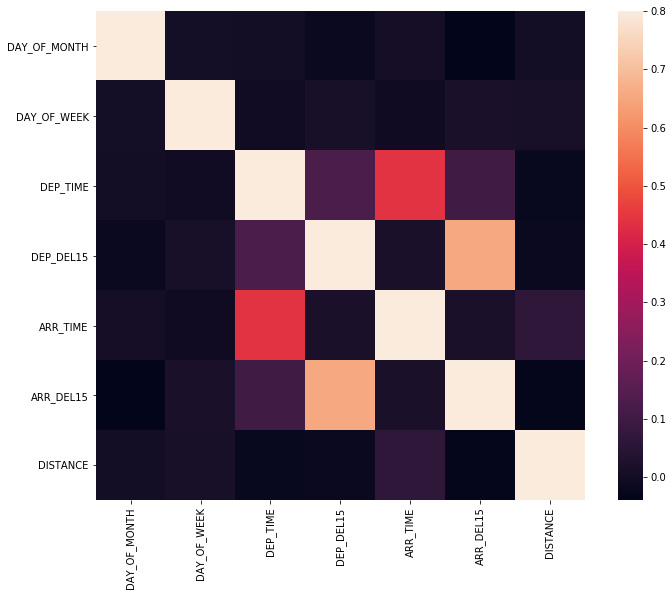

In [85]:
corrmat = data_alaska.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()